In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [29]:
# Read your preproces
df = pd.read_csv('../data/processed/responseFile_with_statistics.csv')

# Select the features and the target variable
features = df[[
    'std_pitch',
    'var_pitch',
    'mean_pitch',
    'median_pitch',
    'std_yaw',
    'var_yaw',
    'mean_yaw',
    'median_yaw',
    'std_roll',
    'var_roll',
    'mean_roll',
    'median_roll'
    ]]

# target class
y = df['Attentive']

# Scale the data
sc = StandardScaler()
features_scaled = sc.fit_transform(features)

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(features_scaled, y, stratify=y, test_size=0.2, random_state=42)

In [30]:

# Define the ANN model
model = Sequential([
    Dense(1024, activation='relu', input_shape=(features.shape[1],)),
    Dropout(0.7),
    Dense(32, activation='relu'),
    Dropout(0.7),
    Dense(8, activation='relu'),
    Dropout(0.25), 
    Dense(1, activation='sigmoid')
])

In [31]:
# Compile the model
lr = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
model.compile(optimizer=optimizer, loss=tf.keras.losses.MeanSquaredLogarithmicError(), metrics=['accuracy'])

In [32]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), class_weight={0: 5, 1: 1}, verbose=0)

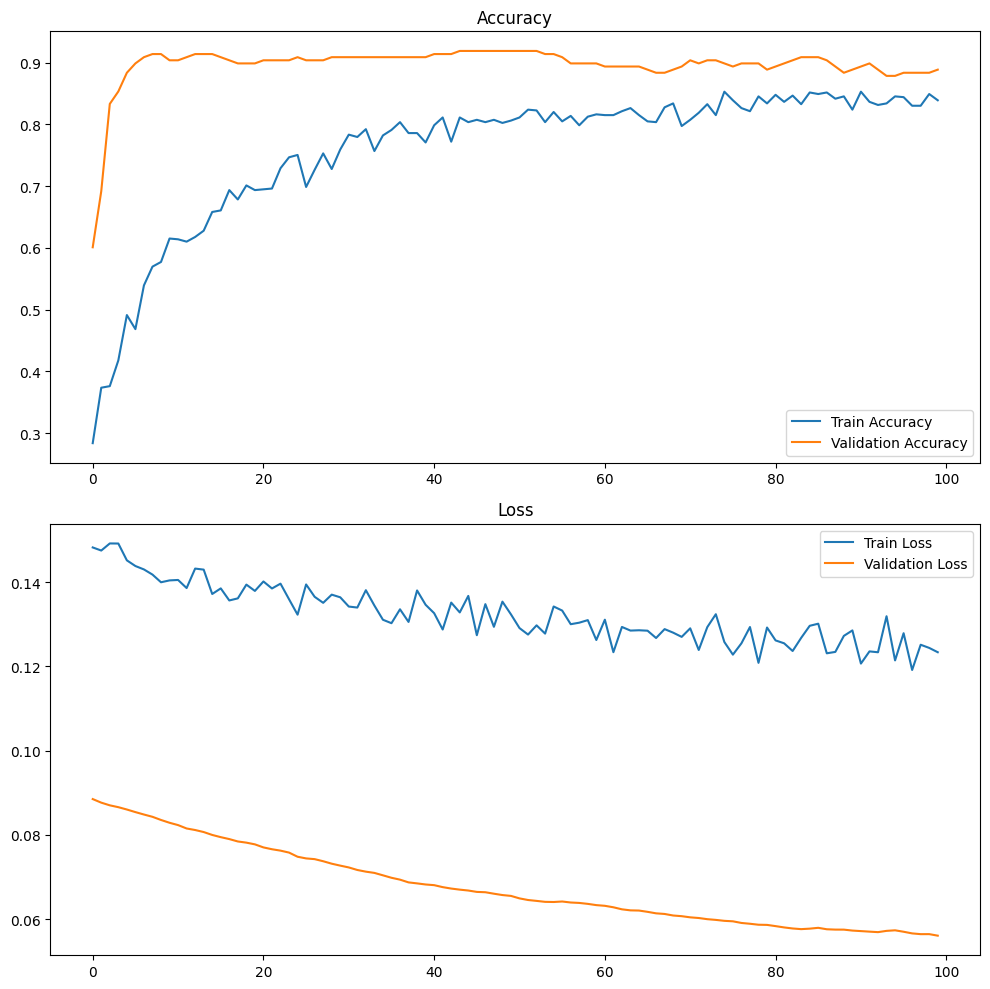

In [33]:
# Plot accuracy and loss
fig, ax = plt.subplots(2, 1, figsize=(10,10))
ax[0].plot(history.history['accuracy'], label='Train Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].legend()
ax[0].set_title('Accuracy')

ax[1].plot(history.history['loss'], label='Train Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].legend()
ax[1].set_title('Loss')

plt.tight_layout()
plt.show()

7/7 [==============================] - 0s 3ms/step
Accuracy: 0.8888888888888888
Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.24      0.27        17
           1       0.93      0.95      0.94       181

    accuracy                           0.89       198
   macro avg       0.62      0.59      0.60       198
weighted avg       0.88      0.89      0.88       198



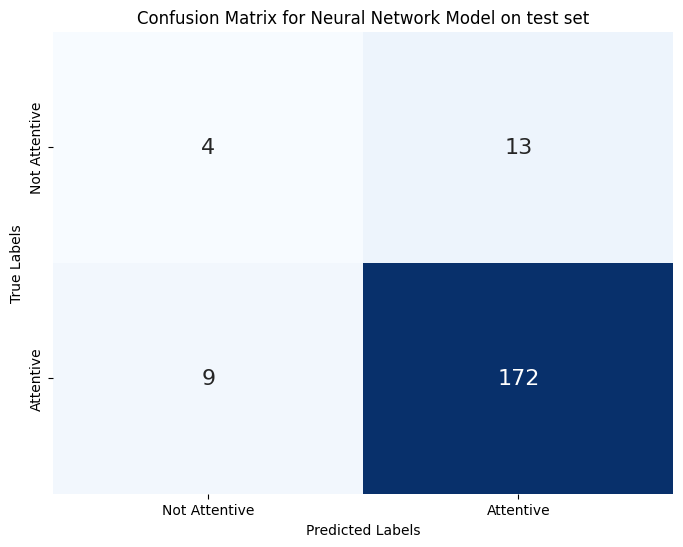

In [34]:
y_pred = (model.predict(X_test) > 0.5).astype(int)
# Generate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
 
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues', cbar=False, annot_kws={"size": 16}, xticklabels=['Not Attentive', 'Attentive'], yticklabels=['Not Attentive', 'Attentive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Neural Network Model on test set')
plt.show()

25/25 [==============================] - 0s 2ms/step
Accuracy: 0.8860759493670886
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.40      0.38        67
           1       0.94      0.93      0.94       723

    accuracy                           0.89       790
   macro avg       0.65      0.67      0.66       790
weighted avg       0.89      0.89      0.89       790



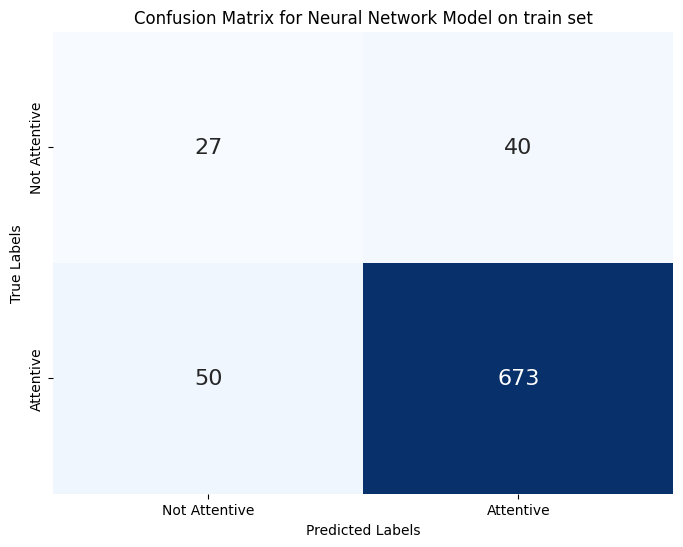

In [35]:
y_pred = (model.predict(X_train) > 0.5).astype(int)
# Generate the confusion matrix
confusion = confusion_matrix(y_train, y_pred)
accuracy = accuracy_score(y_train, y_pred)
confusion = confusion_matrix(y_train, y_pred)
report = classification_report(y_train, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
 
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues', cbar=False, annot_kws={"size": 16}, xticklabels=['Not Attentive', 'Attentive'], yticklabels=['Not Attentive', 'Attentive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Neural Network Model on train set')
plt.show()